<a href="https://colab.research.google.com/github/Abhishek-harsha/Abhishek-N/blob/main/train_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers datasets


In [ ]:

!pip install -q transformers datasets

# STEP 2: Upload your custom training file (train.txt)
from google.colab import files
uploaded = files.upload()  # Upload train.txt here

# STEP 3: Import dependencies
from transformers import GPT2Tokenizer, GPT2LMHeadModel, DataCollatorForLanguageModeling, Trainer, TrainingArguments
from datasets import Dataset
import torch

# STEP 4: Set model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Add padding token if not present
tokenizer.pad_token = tokenizer.eos_token
model.resize_token_embeddings(len(tokenizer))

# STEP 5: Load your text data
def load_custom_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return Dataset.from_dict({"text": [text]})

raw_dataset = load_custom_dataset("train.txt")

# STEP 6: Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples["text"], return_special_tokens_mask=True, truncation=True, padding="max_length", max_length=128)

tokenized_dataset = raw_dataset.map(tokenize_function, batched=True, remove_columns=["text"])

# STEP 7: Prepare data collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # For GPT-style models
)

# STEP 8: Define training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=2,
    save_steps=500,
    save_total_limit=2,
    prediction_loss_only=True,
    logging_dir="./logs",
    logging_steps=50,
    report_to="none",
)

# STEP 9: Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator,
)

# STEP 10: Train the model
trainer.train()

# STEP 11: Save the model and tokenizer
trainer.save_model("./gpt2-finetuned")
tokenizer.save_pretrained("./gpt2-finetuned")

print("✅ Fine-tuning complete. Model saved in ./gpt2-finetuned")


In [ ]:
!pip install diffusers transformers accelerate scipy safetensors


In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# Load model
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Define prompt
prompt = "A futuristic cityscape at sunset with flying cars and neon lights"

# Generate image
image = pipe(prompt).images[0]

# Save image
image_path = "/content/futuristic_city.png"
image.save(image_path)

# Display image
image.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                               torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

prompt = "A futuristic cityscape at sunset with flying cars and neon lights"

# Generate image
image = pipe(prompt).images[0]

# Save image
image_path = "futuristic_city.png"
image.save(image_path)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
import random

def build_markov_chain(text, n=1):
    words = text.split()
    markov_chain = {}

    for i in range(len(words) - n):
        key = tuple(words[i:i + n])
        next_word = words[i + n]

        if key not in markov_chain:
            markov_chain[key] = []
        markov_chain[key].append(next_word)

    return markov_chain

def generate_text(chain, n=1, length=50):
    start = random.choice(list(chain.keys()))
    output = list(start)

    for _ in range(length - n):
        next_words = chain.get(tuple(output[-n:]), None)
        if not next_words:
            break
        next_word = random.choice(next_words)
        output.append(next_word)

    return ' '.join(output)
text = """Machine learning is fascinating. It allows systems to learn from data and make intelligent decisions."""
chain = build_markov_chain(text, n=2)
generated = generate_text(chain, n=2, length=30)

print("Generated Text:\n", generated)

Generated Text:
 is fascinating. It allows systems to learn from data and make intelligent decisions.


In [ ]:
pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo


Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2025-07-31 03:07:00--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  24.3MB/s    in 7.5s    

2025-07-31 03:07:07 (27.7 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



In [ ]:
!bash ./datasets/download_pix2pix_dataset.sh facades

!python test.py \
  --dataroot ./datasets/facades \
  --name facades_label2photo \
  --model pix2pix \
  --direction BtoA


Specified [facades]
for details.

--2025-07-31 03:07:34--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./datasets/facades.tar.gz’

./datasets/facades. 100%[===================>]  28.77M  5.61MB/s    in 6.9s    

2025-07-31 03:07:41 (4.16 MB/s) - ‘./datasets/facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/1

In [ ]:
from IPython.display import Image, display
import glob

output_images = glob.glob('./results/facades_label2photo/test_latest/images/*_fake.png')

for img_path in output_images[:5]:
    print(f"Displaying: {img_path}")
    display(Image(filename=img_path))


In [ ]:
from google.colab import files
from PIL import Image
from IPython.display import display

uploaded = files.upload()

for filename in uploaded.keys():
    print(f"Displaying: {filename}")
    try:
        img = Image.open(BytesIO(uploaded[filename]))
        display(img)
    except Exception as e:
        print(f"Could not display {filename}: {e}")

Saving 1674018668083_xapm4j_2_0.jpg to 1674018668083_xapm4j_2_0.jpg


In [ ]:
pip install diffusers transformers torch

In [ ]:
pip install -q diffusers transformers accelerate gradio scipy safetensors pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 812.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.6 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import gradio as gr
import os
import zipfile
import uuid

# Setup device
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16 if device == "cuda" else torch.float32

# Load the pipeline
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", torch_dtype=dtype
).to(device)

# Make sure output directory exists
os.makedirs("generated_outputs", exist_ok=True)

# Generation function with individual download links
def generate_images_with_links(input_image, prompt, strength, guidance_scale, num_images):
    input_image = input_image.convert("RGB").resize((512, 512))
    image_paths = []

    for _ in range(num_images):
        result = pipe(
            prompt=prompt,
            image=input_image,
            strength=strength,
            guidance_scale=guidance_scale
        ).images[0]
        filename = f"generated_outputs/{uuid.uuid4().hex}.png"
        result.save(filename)
        image_paths.append(filename)

    # Create ZIP
    zip_filename = "generated_outputs/generated_images.zip"
    with zipfile.ZipFile(zip_filename, "w") as zipf:
        for path in image_paths:
            zipf.write(path, os.path.basename(path))

    # Return PIL images and their file paths
    images = [Image.open(path) for path in image_paths]
    return images, image_paths, zip_filename

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## 🖼️ Pix2Pix Batch Generator with Individual & ZIP Downloads")
    gr.Markdown("Upload or capture a sketch, type a prompt, and get multiple outputs with download options!")

    with gr.Row():
        with gr.Column():
            input_image = gr.Image(label="Sketch Input", sources=["upload", "webcam"], type="pil")
            prompt = gr.Textbox(label="Prompt", value="high quality photo of a shoe")
            strength = gr.Slider(0.3, 1.0, value=0.75, label="Strength")
            guidance_scale = gr.Slider(1.0, 15.0, value=7.5, label="Guidance Scale")
            num_images = gr.Slider(1, 6, step=1, value=3, label="Number of Images")
            generate_btn = gr.Button("Generate")

        with gr.Column():
            output_gallery = gr.Gallery(label="Generated Images", columns=3, height="auto")
            individual_links = gr.File(label="Individual Downloads", file_types=[".png"], interactive=False, visible=False)
            zip_file = gr.File(label="Download All (ZIP)", visible=False)

    def process_and_return(img, prompt, s, g, n):
        images, paths, zip_path = generate_images_with_links(img, prompt, s, g, n)
        return images, paths, zip_path

    generate_btn.click(
        fn=process_and_return,
        inputs=[input_image, prompt, strength, guidance_scale, num_images],
        outputs=[output_gallery, individual_links, zip_file]
    )
demo.launch()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://32fd59e72df5c95bdb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Image loaded successfully!


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

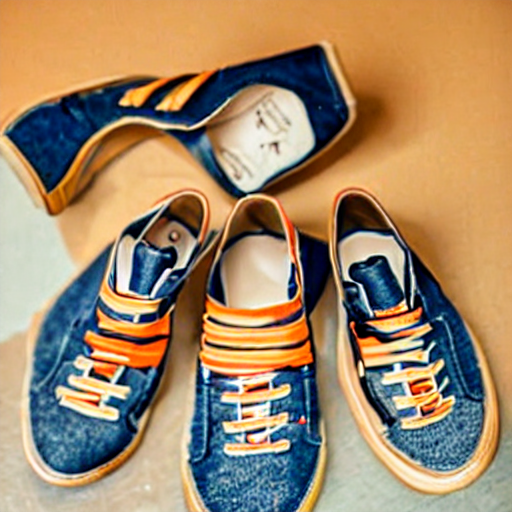

In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import requests
from io import BytesIO
import tempfile
import os

url = "https://i.pinimg.com/1200x/f6/fe/65/f6fe659ea30bf6dc8360ce2b7585e582.jpg"

try:
    response = requests.get(url)
    response.raise_for_status()
    init_image = Image.open(BytesIO(response.content)).convert("RGB").resize((512, 512))
    print("Image loaded successfully!")


    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
        "CompVis/stable-diffusion-v1-4",
        torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
    )
    pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")


    prompt = "a high quality photo of a shoe"


    generated_image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]


    display(generated_image)

except requests.exceptions.HTTPError as e:
    print(f"HTTP error occurred: {e}")
    print("Could not retrieve the image from the provided URL. The image might not exist or the URL is incorrect.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Could not load the image. Please check if the URL is correct and the image file is valid.")

In [ ]:
pip install torch torchvision pillow matplotlib

83281/83281 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
195196/195196 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


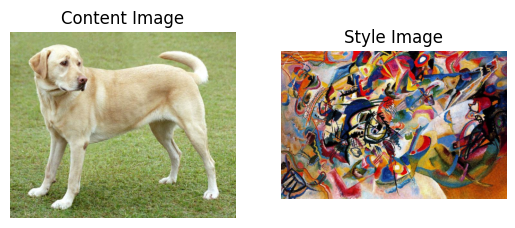

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 336, 512, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 422, 512, 3))
  warnings.warn(msg)


Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed
Total time: 80.6 seconds


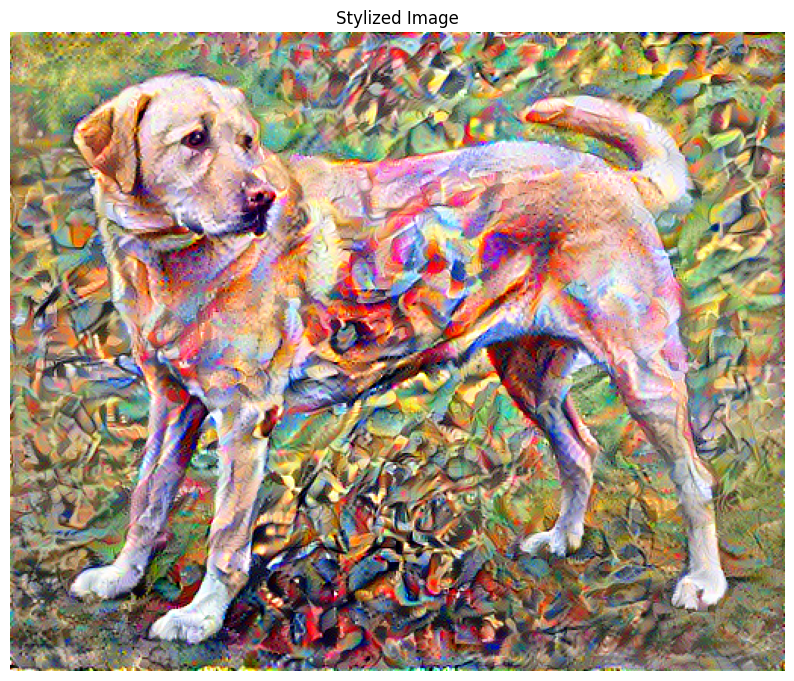

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
import time

def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')

content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg',
                                       'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg',
                                     'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')
plt.show()

vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
vgg.trainable = False

content_layers = ['block5_conv2']

style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

def vgg_layers(layer_names):
    outputs = [vgg.get_layer(name).output for name in layer_names]
    model = tf.keras.Model([vgg.input], outputs)
    return model

def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result / num_locations

class StyleContentModel(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers):
        super(StyleContentModel, self).__init__()
        self.vgg = vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False

    def call(self, inputs):
        inputs = inputs * 255.0
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs, content_outputs = (outputs[:self.num_style_layers], outputs[self.num_style_layers:])
        style_outputs = [gram_matrix(style_output) for style_output in style_outputs]
        content_dict = {content_name: value for content_name, value in zip(self.content_layers, content_outputs)}
        style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}
        return {'content': content_dict, 'style': style_dict}

extractor = StyleContentModel(style_layers, content_layers)
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

image = tf.Variable(content_image)

opt = tf.keras.optimizers.Adam(learning_rate=0.02)
style_weight = 1e-2
content_weight = 1e4
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name])**2)
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name])**2)
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = extractor(image)
        loss = style_content_loss(outputs)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(tf.clip_by_value(image, 0.0, 1.0))

epochs = 10
steps_per_epoch = 100

start = time.time()

for n in range(epochs):
    for m in range(steps_per_epoch):
        train_step(image)
    print(f"Epoch {n+1} completed")

end = time.time()
print(f"Total time: {end - start:.1f} seconds")


plt.figure(figsize=(10, 10))
imshow(image, 'Stylized Image')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()